# Social Analytics for Select Twitter Accounts

Observed Trend 1: <br>
>CBS seemed to be by far the most positive outlet with their tweets. Only a handful of their tweets registered below neutral. The other 4 outlets registers much closer to neutral in their past 100 tweets.
<br>

Observed Trend 2: <br>
>Only one other outlet register a score positive - BBC. While you could be tempted to draw some kind of conclusion based on political leanings, it would be hasty to do so without sampling many more tweets. 100 tweets isnt enough to conclude something that general. However, you could use the most recent 100 tweets to analyze coverage of a recent event. Say a mass-shooting or other tramatic event. I would imagine the news outlet would mention the this story many times and you could gauge how they view the event with their tweet sentiment.
<br>

Observed Trend 3: <br>
>Of the most recent tweets, FoxNews tended to be the most negative of the bunch. However, CNN and the New York Times weren't far behind. It would be interesting to compare the content of their tweets against eachother for multiple events and correlate it all together. To see, over the same news events, which outlet tended to be more or less positive. As is, only grabbing recent tweets would allow an outlet to cherry pick only "good" stories to push, or only XXXX topic that tends to be negative/positive (Terrorism, mass-shootings, gun-control, etc).

In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import os

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Loading Keys
api_dir = os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.path.realpath('__file__')))))
file_name = os.path.join(api_dir, "api_keys.json")
data = json.load(open(file_name))

# Setting Keys
consumer_key = data['twitter_consumer_key']
consumer_secret = data['twitter_consumer_secret']
access_token = data['twitter_access_token']
access_token_secret = data['twitter_access_token_secret']

In [3]:
# Setting up Auth
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [143]:
def print_Previous_Tweets(df, x_title, y_title, title):
    # Creates a plot based on each item passed in from the DF
    
    # Formatting --- Pre-data
    colorlist = ["#e6194b", "#3cb44b", "#0082c8", "#f58231", "#911eb4", "#46f0f0", "#f032e6", "#ffe119", "#d2f53c", "#fabebe", "#000080", "#ffd8b1", "#808000", "#aaffc3", "#800000", "#fffac8", "#aa6e28", "#e6beff", "#008080"]
    plt.figure(figsize = (10, 5))
    
    # Setting up loop to create plot
    ball = []
    for each in range(len(df.columns)):
        ball.append(plt.scatter(df.index, df[df.columns[each]], label = df.columns[each], \
                                 color = colorlist[each], marker = 'o', s=100, edgecolors="black", alpha=.75))
   
    # Formatting --- Post-data
    #plt.xlim(-5,105)
    #plt.ylim(-1.01,1.01)
    plt.legend(loc = "best")
    plt.xlabel(f'{x_title}', fontsize=16)
    plt.ylabel(f'{y_title}', fontsize=16)
    plt.title(f'{title}', fontsize=22)
    #plt.grid(alpha = .25)

In [174]:
# Vader Analysis on Tweets based on a tag passed in - Returns a DICTIONARY (not a DF) after run
def runVader(user_tag):
    
    # Setting variables
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    date_list = []
    tweet_text_list = []
    
    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):

        # Get all tweets from home feed  --  Page=x was giving double 1st page results
        public_tweets = api.user_timeline(user_tag, page=x+1)

        # Loop through all tweets 
        for tweet in public_tweets:
            
            # Run Vader Analysis on each tweet and add values to the appropriate arrays
            compound_list.append(analyzer.polarity_scores(tweet["text"])["compound"])
            positive_list.append(analyzer.polarity_scores(tweet["text"])["pos"])
            negative_list.append(analyzer.polarity_scores(tweet["text"])["neg"])
            neutral_list.append(analyzer.polarity_scores(tweet["text"])["neu"])
            date_list.append(tweet["created_at"])
            tweet_text_list.append(tweet["text"])
            
    # Pushing results to a dict       
    sentiment = {
                "Date": date_list,
                "Compound": compound_list,
                "Positive": positive_list,
                "Neutral": negative_list,
                "Negative": neutral_list,
                "Text": tweet_text_list
    }
    
    # Prints progress of API Calls
    print('--------------------------------------------------------')
    print(f'Processing Twitter handle: {user_tag}')
    print('--------------------------------------------------------')
    return(sentiment)

# Tweet Gather and Storage Execution

In [177]:
# Target Accounts
target_users = ["@BBC","@CBS","@CNN","@FoxNews","@nytimes"]

# Creating empty DataFrame for Compounds
compound_df = pd.DataFrame()

# Looping through for each account and saving results
for user in target_users:

    # Creating a DF from the Vader analysis on 100 previous tweets for each target user
    sentiment_df = pd.DataFrame(runVader(user))
    
    # Export each analysis to a csv for later use if needed
    # NOTE - Might need utf-8 encoding on save
    sentiment_df.to_csv(f'Resources\{user}.csv', index=False)
    
    # Merging DataFrames and formating columns with user
    compound_df = pd.concat([compound_df, sentiment_df['Compound']], axis=1)
    compound_df.rename(columns={'Compound': f'{user}'}, inplace=True)

# Printing Results of DF
#compound_df

--------------------------------------------------------
Processing Twitter handle: @BBC
--------------------------------------------------------
--------------------------------------------------------
Processing Twitter handle: @CBS
--------------------------------------------------------
--------------------------------------------------------
Processing Twitter handle: @CNN
--------------------------------------------------------
--------------------------------------------------------
Processing Twitter handle: @FoxNews
--------------------------------------------------------
--------------------------------------------------------
Processing Twitter handle: @nytimes
--------------------------------------------------------


# Sentiment Analysis - Previous Tweets

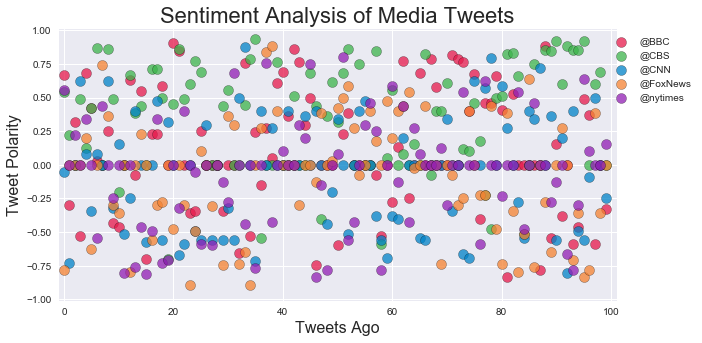

In [148]:
# Calling printing function
print_Previous_Tweets(compound_df,'Tweets Ago','Tweet Polarity','Sentiment Analysis of Media Tweets')

# Post format of printer
plt.style.use('seaborn')
plt.legend(loc = 'upper right', bbox_to_anchor=(1.15,1))
plt.xlim(-1,101)
plt.ylim(-1.01,1.01)

# Saving figure
plt.savefig('Resources/Sentiment Tweet Analysis - Previous Tweets.png')

# Showing results
plt.show()

# Sentiment Analysis - Overal Sentiment

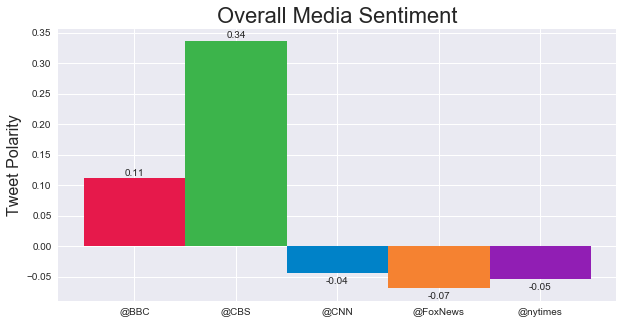

In [173]:
# Formatting plot
colorlist = ["#e6194b", "#3cb44b", "#0082c8", "#f58231", "#911eb4", "#46f0f0", "#f032e6", "#ffe119",\
             "#d2f53c", "#fabebe", "#000080", "#ffd8b1", "#808000", "#aaffc3", "#800000", "#fffac8", \
             "#aa6e28", "#e6beff", "#008080"]
plt.figure(figsize = (10, 5))
plt.ylabel('Tweet Polarity', fontsize=16)
plt.title('Overall Media Sentiment', fontsize=22)

# Creating plot
bar_graph = plt.bar(compound_df.columns, compound_df.mean(), 1, color=colorlist)


# Credit to https://matplotlib.org/gallery/api/barchart.html   for most of the code for autolabel
# Took Autolabel idea and modified for neg scored to display under graph instead
def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        if (height > 0):
            plt.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{:,.2f}'.format(height), ha=ha[xpos], va='bottom')

        else:
            plt.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height-.02,
                '{:,.2f}'.format(height), ha=ha[xpos], va='bottom')
            
autolabel(bar_graph, 'center')
    
# Saving figure
plt.savefig('Resources/Sentiment Tweet Analysis - Overall.png')

# Showing results
plt.show()